Date:  03/17//2025      
Author:  Mercy Amankwah      
Purpose:  Initial Model Exploration for the Kaggle Alzheimers' dataset. 

In [1]:
#data handling and plotting libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
## Spliting the training dataset
from sklearn.model_selection import train_test_split

In [2]:
#load and split data
df_train = pd.read_csv("../data/kaggle_train.csv") 
df_train_xgb = df_train.drop(columns=['DoctorInCharge'])
y = df_train_xgb.Diagnosis
X = df_train_xgb.drop(columns=['Diagnosis'])
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


## **Introduction**
The models we explore in this notebook are: 
1. Logistic Regression
2. Gradient Boosting classifier
3. Adaptive Boosting classifier
4. Random Forest classifier
5. Extreme Gradient Boosting (XGBoost) classifier

In [3]:
#importing libraries for models to explore and error metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, classification_report


mse = {}
accuracy = {}
f1 = {}
models  = {
   # 'lr' : LogisticRegression(max_iter = 200),
    'gbc' : GradientBoostingClassifier(),
    'xgbc' : XGBClassifier(),
    'rfc'  :  RandomForestClassifier(random_state=42),
    'adbc' : AdaBoostClassifier()
}

### **Comparing across models for all features**

In [4]:
for name, model in models.items():
    model.fit(X_train,y_train)
    y_pred = model.predict(X_val)
    mse[name] = mean_squared_error(y_val,y_pred)
    accuracy[name] = accuracy_score(y_val, y_pred)
    #f1[name] = f1_score(y_val, y_pred, average = 'weighted')



c:\Users\ladyj\anaconda3\envs\erdos_spring_2025\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [5]:
print('mean squared errors:\n',mse,'\n\n accuracies\n:', accuracy)#, '\n\n F1 scores:\n', f1)
#print(f"mean squared erros: {mse:.4f}")

mean squared errors:
 {'gbc': np.float64(0.0377906976744186), 'xgbc': np.float64(0.0436046511627907), 'rfc': np.float64(0.055232558139534885), 'adbc': np.float64(0.07848837209302326)} 

 accuracies
: {'gbc': 0.9622093023255814, 'xgbc': 0.9563953488372093, 'rfc': 0.9447674418604651, 'adbc': 0.9215116279069767}


In [6]:
from sklearn.preprocessing import StandardScaler

# prepare standardize
scaler = StandardScaler()
scaler.fit(X)

# standardize data
X = scaler.transform(X)
X_scale_tr, X_scale_val, y_scale_tr, y_scale_val = train_test_split(X, y, test_size=0.2, random_state=42)



In [7]:
mse_sc = {}
accuracy_sc = {}
f1_sc = {}
models  = {
    #'lr' : LogisticRegression(max_iter = 200),
    'gbc' : GradientBoostingClassifier(),
    'xgbc' : XGBClassifier(),
    'rfc'  :  RandomForestClassifier(random_state=42),
    'adbc' : AdaBoostClassifier()
}

In [8]:
for name, model in models.items():
    model.fit(X_scale_tr,y_scale_tr)
    y_pred = model.predict(X_scale_val)
    mse_sc[name] = mean_squared_error(y_scale_val,y_pred)
    accuracy_sc[name] = accuracy_score(y_scale_val, y_pred)
    #f1[name] = f1_score(y_val, y_pred, average = 'weighted')



c:\Users\ladyj\anaconda3\envs\erdos_spring_2025\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [9]:
print('mean squared errors:\n',mse_sc,'\n\n accuracies\n:', accuracy_sc)#, '\n\n F1 scores:\n', f1)
    #f1[name] = f1_score(y_val, y_pred, average = 'weighted')


mean squared errors:
 {'gbc': np.float64(0.0377906976744186), 'xgbc': np.float64(0.0436046511627907), 'rfc': np.float64(0.055232558139534885), 'adbc': np.float64(0.07848837209302326)} 

 accuracies
: {'gbc': 0.9622093023255814, 'xgbc': 0.9563953488372093, 'rfc': 0.9447674418604651, 'adbc': 0.9215116279069767}


**I seem to be having problems with the logistic regression model so I'll explore that below**

In [10]:
lr_model = LogisticRegression()
lr_model.fit(X_scale_tr,y_scale_tr)
lr_pred = lr_model.predict(X_scale_val)
lr_mse_sc = mean_squared_error(y_scale_val, lr_pred)
lr_acc_sc = accuracy_score(y_scale_val,lr_pred)
print('mse: ', lr_mse_sc, 'accuracy: ', lr_acc_sc)

mse:  0.13953488372093023 accuracy:  0.8604651162790697


## **Comparing Model performance across various Subcategories of the features**

In [11]:
#relevant packages

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [12]:
## Reading the traning and testing datasets
df = pd.read_csv("../data/kaggle_train.csv")

## Dropping redundant columns
df = df.drop(columns = ['DoctorInCharge' , 'PatientID' ])

In [13]:
## Seperating features into subcategories

all_features = [   'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
               'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
               'SleepQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease',
               'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP',
               'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
               'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
               'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
               'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
               'Forgetfulness' , 'Diagnosis']
demo_features = ['Age', 'Gender', 'Ethnicity','EducationLevel','Diagnosis']
life_style_features = ['BMI','Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality','Diagnosis']
medic_hist_features = ['FamilyHistoryAlzheimers', 'CardiovascularDisease','Diabetes', 'Depression', 'HeadInjury', 'Hypertension','Diagnosis']
clinical_features = ['SystolicBP','DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL','CholesterolTriglycerides','Diagnosis']
cognitive_features = ['MMSE', 'FunctionalAssessment','MemoryComplaints', 'BehavioralProblems', 'ADL','Diagnosis']
symptoms_features = ['Confusion','Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks','Forgetfulness','Diagnosis']

no_cognitive = [item for item in all_features if item not in cognitive_features]
no_cognitive.append('Diagnosis')

subcategory_dict = {'all_features' : all_features,'demo':demo_features ,'lifestyle': life_style_features , 'medic' : medic_hist_features , 
                    'clinical':clinical_features , 'cognitive': cognitive_features , 'symptoms': symptoms_features , 'no_cognitive': no_cognitive}

In [14]:
## Splitting the training data to get validation data
df_train, df_test = train_test_split(df, random_state= 123 , shuffle= True,test_size=0.2, stratify=df['Diagnosis'])

### **Logistic Regression**

In [15]:
lr_pipe = Pipeline([('scale', StandardScaler()), ('lr', LogisticRegression(random_state=42))])

lr_acc_score = {}
lr_conf_matrix = {} #confusion matrix

for key in subcategory_dict:
    item = subcategory_dict[key]
    lr_pipe.fit(df_train[item[:-1]], df_train.Diagnosis)
    pred = lr_pipe.predict(df_test[item[:-1]])

    lr_acc_score[key] = [accuracy_score(pred, df_test.Diagnosis),
                           precision_score(pred, df_test.Diagnosis, zero_division=1),
                           recall_score(pred, df_test.Diagnosis),
                           f1_score(pred, df_test.Diagnosis),
                           mean_squared_error(pred, df_test.Diagnosis)]
    lr_conf_matrix[key] = confusion_matrix(pred, df_test.Diagnosis)
    
    
lr_acc_score_df = pd.DataFrame(lr_acc_score, index=['Accuracy Score', 'Precision Score', 'Recall Score', 'F1 Score', 'MSE'])
#lr_conf_matrix_df = pd.DataFrame(lr_conf_matrix, index = [])
lr_acc_score_df



c:\Users\ladyj\anaconda3\envs\erdos_spring_2025\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ladyj\anaconda3\envs\erdos_spring_2025\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ladyj\anaconda3\envs\erdos_spring_2025\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ladyj\anac

,all_features,demo,lifestyle,medic,clinical,cognitive,symptoms,no_cognitive
Accuracy Score,0.860465,0.648256,0.648256,0.648256,0.648256,0.854651,0.648256,0.645349
Precision Score,0.760331,0.000000,0.000000,0.000000,0.000000,0.743802,0.000000,0.000000
Recall Score,0.828829,0.000000,0.000000,0.000000,0.000000,0.825688,0.000000,0.000000
F1 Score,0.793103,0.000000,0.000000,0.000000,0.000000,0.782609,0.000000,0.000000
MSE,0.139535,0.351744,0.351744,0.351744,0.351744,0.145349,0.351744,0.354651


In [16]:
'''

#plt.subplots(1,3, figsize=(14,5))

#plt.subplot(1,3,1)
#sns.heatmap(lr_conf_matrix["all_features"], annot=True, fmt="d", cmap="Blues", xticklabels=['No Alzheimers', 'Alzheimers'], yticklabels=['No Alzheimers', 'Alzheimers'])

'''
'''
plt.subplot(1,3,2)
sns.heatmap(lr_conf_matrix["demo"], annot=True, fmt="d", cmap="Blues", xticklabels=['No Alzheimers', 'Alzheimers'], yticklabels=['No Alzheimers', 'Alzheimers'])

plt.subplot(1,3,3)
sns.heatmap(lr_conf_matrix["lifestyle"], annot=True, fmt="d", cmap="Blues", xticklabels=['No Alzheimers', 'Alzheimers'], yticklabels=['No Alzheimers', 'Alzheimers'])
'''

'''
#plt.show()

plt.subplots(2,int(len(lr_conf_matrix)/2), figsize=(20,5))
for ind, key in enumerate(lr_conf_matrix):
    if ind<=3:
        plt.subplot(1,len(lr_conf_matrix),ind+1)
    else:
        plt.subplot(2,int(len(lr_conf_matrix)/2),ind+1)
    sns.heatmap(lr_conf_matrix[key], annot=True, fmt="d", cmap="Blues", xticklabels=['No Alzheimers', 'Alzheimers'], yticklabels=['No Alzheimers', 'Alzheimers'])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
plt.show()

'''


'\n#plt.show()\n\nplt.subplots(2,int(len(lr_conf_matrix)/2), figsize=(20,5))\nfor ind, key in enumerate(lr_conf_matrix):\n    if ind<=3:\n        plt.subplot(1,len(lr_conf_matrix),ind+1)\n    else:\n        plt.subplot(2,int(len(lr_conf_matrix)/2),ind+1)\n    sns.heatmap(lr_conf_matrix[key], annot=True, fmt="d", cmap="Blues", xticklabels=[\'No Alzheimers\', \'Alzheimers\'], yticklabels=[\'No Alzheimers\', \'Alzheimers\'])\n    plt.xlabel("Predicted Label")\n    plt.ylabel("True Label")\n    plt.title("Confusion Matrix")\nplt.show()\n\n'

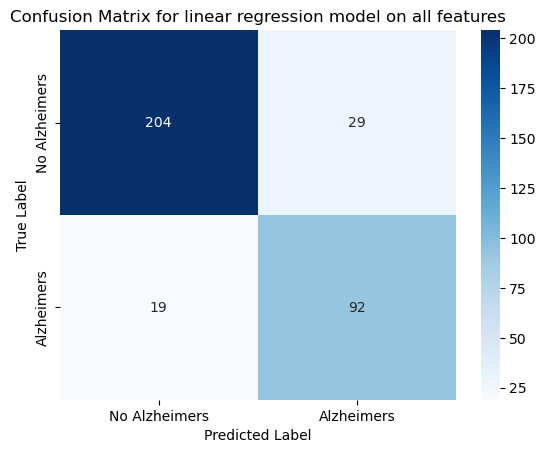

In [17]:
sns.heatmap(lr_conf_matrix["all_features"], annot=True, fmt="d", cmap="Blues", xticklabels=['No Alzheimers', 'Alzheimers'], yticklabels=['No Alzheimers', 'Alzheimers'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for linear regression model on all features")
plt.show()


### **Gradient Boosting Classifier**

In [18]:
gbc_pipe = Pipeline([('scale', StandardScaler()), ('gbc', GradientBoostingClassifier(random_state=42))])

gbc_accu_score = {}
gbc_conf_matrix = {}

for key in subcategory_dict:
    item = subcategory_dict[key]
    gbc_pipe.fit(df_train[item[:-1]], df_train.Diagnosis)
    pred = gbc_pipe.predict(df_test[item[:-1]])

    gbc_accu_score[key] = [accuracy_score(pred, df_test.Diagnosis),
                           precision_score(pred, df_test.Diagnosis, zero_division=1),
                           recall_score(pred, df_test.Diagnosis),
                           f1_score(pred, df_test.Diagnosis),
                           mean_squared_error(pred, df_test.Diagnosis)]
    gbc_conf_matrix[key] = confusion_matrix(pred, df_test.Diagnosis)

gbc_accu_score_df = pd.DataFrame(gbc_accu_score, index=['Accuracy Score', 'Precision Score', 'Recall Score', 'F1 Score', 'MSE'])
gbc_accu_score_df


,all_features,demo,lifestyle,medic,clinical,cognitive,symptoms,no_cognitive
Accuracy Score,0.950581,0.648256,0.639535,0.648256,0.625000,0.953488,0.639535,0.633721
Precision Score,0.925620,0.066116,0.066116,0.024793,0.123967,0.917355,0.008264,0.099174
Recall Score,0.933333,0.500000,0.421053,0.500000,0.394737,0.948718,0.200000,0.413793
F1 Score,0.929461,0.116788,0.114286,0.047244,0.188679,0.932773,0.015873,0.160000
MSE,0.049419,0.351744,0.360465,0.351744,0.375000,0.046512,0.360465,0.366279


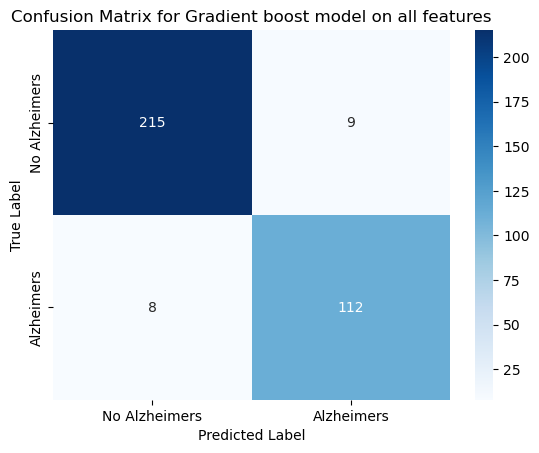

In [19]:
sns.heatmap(gbc_conf_matrix["all_features"], annot=True, fmt="d", cmap="Blues", xticklabels=['No Alzheimers', 'Alzheimers'], yticklabels=['No Alzheimers', 'Alzheimers'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Gradient boost model on all features")
plt.show()

### **Adaptive Boosting Classifier**

In [20]:
adaboost_pipe = Pipeline([('scale', StandardScaler()), ('gbc', AdaBoostClassifier(random_state=42))])
adaboost_accu_score = {}
adaboost_conf_matrix = {}

for key in subcategory_dict:
    item = subcategory_dict[key]
    adaboost_pipe.fit(df_train[item[:-1]], df_train.Diagnosis)
    pred = adaboost_pipe.predict(df_test[item[:-1]])

    adaboost_accu_score[key] = [accuracy_score(pred, df_test.Diagnosis),
                           precision_score(pred, df_test.Diagnosis, zero_division=1),
                           recall_score(pred, df_test.Diagnosis),
                           f1_score(pred, df_test.Diagnosis),
                           mean_squared_error(pred, df_test.Diagnosis)]
    adaboost_conf_matrix[key] = confusion_matrix(pred, df_test.Diagnosis)

adaboost_accu_score_df = pd.DataFrame(adaboost_accu_score, index=['Accuracy Score', 'Precision Score', 'Recall Score', 'F1 Score', 'MSE'])
adaboost_accu_score_df


c:\Users\ladyj\anaconda3\envs\erdos_spring_2025\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\ladyj\anaconda3\envs\erdos_spring_2025\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\ladyj\anaconda3\envs\erdos_spring_2025\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ladyj\anaconda3\envs\erdos_spring_2025\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.

,all_features,demo,lifestyle,medic,clinical,cognitive,symptoms,no_cognitive
Accuracy Score,0.906977,0.648256,0.642442,0.648256,0.613372,0.927326,0.648256,0.622093
Precision Score,0.851240,0.000000,0.049587,0.000000,0.082645,0.909091,0.000000,0.206612
Recall Score,0.880342,0.000000,0.428571,0.000000,0.312500,0.887097,0.000000,0.423729
F1 Score,0.865546,0.000000,0.088889,0.000000,0.130719,0.897959,0.000000,0.277778
MSE,0.093023,0.351744,0.357558,0.351744,0.386628,0.072674,0.351744,0.377907


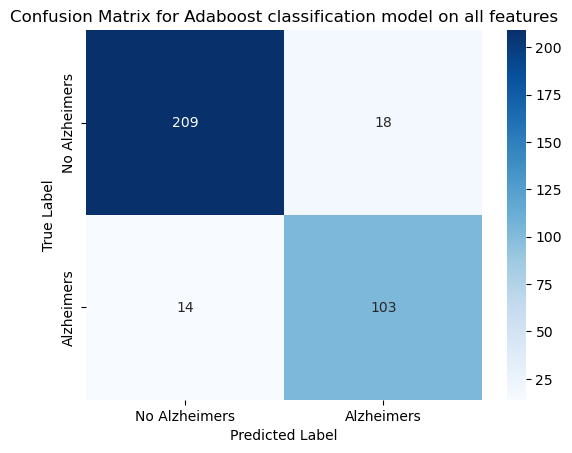

In [21]:
#Plotting confusion matrix
sns.heatmap(adaboost_conf_matrix["all_features"], annot=True, fmt="d", cmap="Blues", xticklabels=['No Alzheimers', 'Alzheimers'], yticklabels=['No Alzheimers', 'Alzheimers'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Adaboost classification model on all features")
plt.show()

### **Random Forest Classifier**

In [22]:
rfc_pipe = Pipeline([('scale', StandardScaler()), ('gbc', RandomForestClassifier(random_state=42))])
rfc_accu_score = {}
rfc_conf_matrix = {}

for key in subcategory_dict:
    item = subcategory_dict[key]
    rfc_pipe.fit(df_train[item[:-1]], df_train.Diagnosis)
    pred = rfc_pipe.predict(df_test[item[:-1]])

    rfc_accu_score[key] = [accuracy_score(pred, df_test.Diagnosis),
                           precision_score(pred, df_test.Diagnosis, zero_division=1),
                           recall_score(pred, df_test.Diagnosis),
                           f1_score(pred, df_test.Diagnosis),
                           mean_squared_error(pred, df_test.Diagnosis)]
    rfc_conf_matrix[key] = confusion_matrix(pred, df_test.Diagnosis)

rfc_accu_score_df = pd.DataFrame(rfc_accu_score, index=['Accuracy Score', 'Precision Score', 'Recall Score', 'F1 Score', 'MSE'])
rfc_accu_score_df

,all_features,demo,lifestyle,medic,clinical,cognitive,symptoms,no_cognitive
Accuracy Score,0.936047,0.508721,0.607558,0.648256,0.610465,0.956395,0.639535,0.651163
Precision Score,0.851240,0.297521,0.074380,0.024793,0.082645,0.909091,0.008264,0.049587
Recall Score,0.962617,0.300000,0.281250,0.500000,0.303030,0.964912,0.200000,0.545455
F1 Score,0.903509,0.298755,0.117647,0.047244,0.129870,0.936170,0.015873,0.090909
MSE,0.063953,0.491279,0.392442,0.351744,0.389535,0.043605,0.360465,0.348837


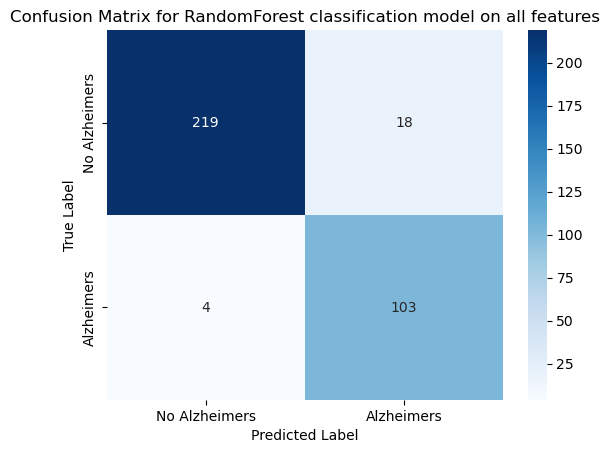

In [23]:
#Plotting confusion matrix
sns.heatmap(rfc_conf_matrix["all_features"], annot=True, fmt="d", cmap="Blues", xticklabels=['No Alzheimers', 'Alzheimers'], yticklabels=['No Alzheimers', 'Alzheimers'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for RandomForest classification model on all features")
plt.show()

### **XGBoost**

In [24]:
xgbc_pipe = Pipeline([('scale', StandardScaler()), ('gbc', XGBClassifier(random_state=42))])
xgbc_accu_score = {}
xgbc_conf_matrix = {}

for key in subcategory_dict:
    item = subcategory_dict[key]
    xgbc_pipe.fit(df_train[item[:-1]], df_train.Diagnosis)
    pred = xgbc_pipe.predict(df_test[item[:-1]])

    xgbc_accu_score[key] = [accuracy_score(pred, df_test.Diagnosis),
                           precision_score(pred, df_test.Diagnosis, zero_division=1),
                           recall_score(pred, df_test.Diagnosis),
                           f1_score(pred, df_test.Diagnosis),
                           mean_squared_error(pred, df_test.Diagnosis)]
    xgbc_conf_matrix[key] = confusion_matrix(pred, df_test.Diagnosis)

xgbc_accu_score_df = pd.DataFrame(xgbc_accu_score, index=['Accuracy Score', 'Precision Score', 'Recall Score', 'F1 Score', 'MSE'])
xgbc_accu_score_df

,all_features,demo,lifestyle,medic,clinical,cognitive,symptoms,no_cognitive
Accuracy Score,0.950581,0.552326,0.619186,0.645349,0.595930,0.953488,0.639535,0.619186
Precision Score,0.892562,0.280992,0.264463,0.041322,0.280992,0.909091,0.008264,0.165289
Recall Score,0.964286,0.336634,0.432432,0.454545,0.395349,0.956522,0.200000,0.400000
F1 Score,0.927039,0.306306,0.328205,0.075758,0.328502,0.932203,0.015873,0.233918
MSE,0.049419,0.447674,0.380814,0.354651,0.404070,0.046512,0.360465,0.380814


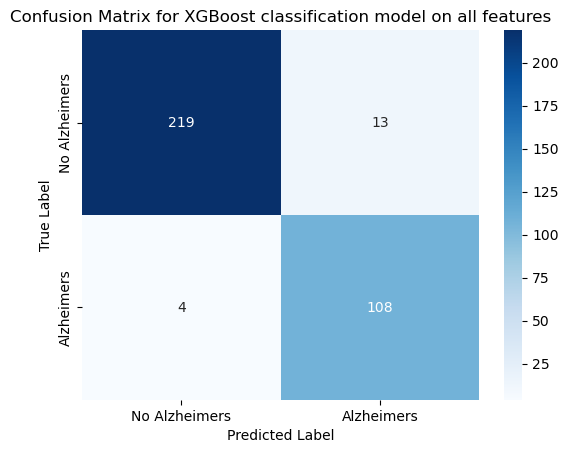

In [25]:
#Plotting confusion matrix
sns.heatmap(xgbc_conf_matrix["all_features"], annot=True, fmt="d", cmap="Blues", xticklabels=['No Alzheimers', 'Alzheimers'], yticklabels=['No Alzheimers', 'Alzheimers'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for XGBoost classification model on all features")
plt.show()

## **Model exploration on subjects with no memory complaints**

In [26]:
## Load the traning dataset
df = pd.read_csv("../data/kaggle_train.csv")

## Dropping redundant columns
df = df.drop(columns = ['DoctorInCharge' , 'PatientID' ])

In [27]:
df.describe()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
count,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,...,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000
mean,74.960442,0.500291,0.698080,1.283304,27.687408,0.286795,9.978133,4.942195,4.972312,7.038044,...,5.069688,0.205934,0.156486,4.970744,0.201280,0.158813,0.148342,0.161722,0.296684,0.353112
std,9.065000,0.500145,0.994836,0.904339,7.209284,0.452396,5.777363,2.827319,2.900920,1.758166,...,2.890435,0.404500,0.363422,2.947606,0.401073,0.365608,0.355542,0.368303,0.456929,0.478076
min,60.000000,0.000000,0.000000,0.000000,15.008851,0.000000,0.002003,0.003616,0.009385,4.002629,...,0.000460,0.000000,0.000000,0.001288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,67.000000,0.000000,0.000000,1.000000,21.641242,0.000000,5.137582,2.612521,2.415726,5.517895,...,2.562307,0.000000,0.000000,2.324166,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,75.000000,1.000000,0.000000,1.000000,27.919813,0.000000,9.805564,4.801357,5.050778,7.090395,...,5.098709,0.000000,0.000000,5.026306,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,83.000000,1.000000,1.000000,2.000000,33.842594,1.000000,15.181033,7.380416,7.480424,8.552783,...,7.496824,0.000000,0.000000,7.583825,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,90.000000,1.000000,3.000000,3.000000,39.992767,1.000000,19.989293,9.987429,9.997203,9.999840,...,9.996467,1.000000,1.000000,9.999747,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
#Separating dataset into those with and without memory complaints
df_mem_comp_true = df[df['MemoryComplaints']==1]

df_mem_comp_false = df[df['MemoryComplaints']==0]

In [29]:
## Seperating features into subcategories

all_features = [   'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
               'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
               'SleepQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease',
               'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP',
               'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
               'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
               'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
               'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
               'Forgetfulness' , 'Diagnosis']
demo_features = ['Age', 'Gender', 'Ethnicity','EducationLevel','Diagnosis']
life_style_features = ['BMI','Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality','Diagnosis']
medic_hist_features = ['FamilyHistoryAlzheimers', 'CardiovascularDisease','Diabetes', 'Depression', 'HeadInjury', 'Hypertension','Diagnosis']
clinical_features = ['SystolicBP','DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL','CholesterolTriglycerides','Diagnosis']
cognitive_features = ['MMSE', 'FunctionalAssessment','MemoryComplaints', 'BehavioralProblems', 'ADL','Diagnosis']
symptoms_features = ['Confusion','Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks','Forgetfulness','Diagnosis']

no_cognitive = [item for item in all_features if item not in cognitive_features]
no_cognitive.append('Diagnosis')

subcategory_dict = {'all_features' : all_features,'demo':demo_features ,'lifestyle': life_style_features , 'medic' : medic_hist_features , 
                    'clinical':clinical_features , 'cognitive': cognitive_features , 'symptoms': symptoms_features , 'no_cognitive': no_cognitive}

In [30]:
## Splitting the training data to get validation data
df_train, df_test = train_test_split(df_mem_comp_false, random_state= 123 , shuffle= True,test_size=0.2, stratify=df_mem_comp_false['Diagnosis'])

### **Logistic Regression**

In [31]:
lr_pipe = Pipeline([('scale', StandardScaler()), ('lr', LogisticRegression(random_state=42))])

lr_acc_score = {}
lr_conf_matrix = {} #confusion matrix

for key in subcategory_dict:
    item = subcategory_dict[key]
    lr_pipe.fit(df_train[item[:-1]], df_train.Diagnosis)
    pred = lr_pipe.predict(df_test[item[:-1]])

    lr_acc_score[key] = [accuracy_score(pred, df_test.Diagnosis),
                           precision_score(pred, df_test.Diagnosis, zero_division=1),
                           recall_score(pred, df_test.Diagnosis),
                           f1_score(pred, df_test.Diagnosis),
                           mean_squared_error(pred, df_test.Diagnosis)]
    lr_conf_matrix[key] = confusion_matrix(pred, df_test.Diagnosis)
    
    
lr_acc_score_df = pd.DataFrame(lr_acc_score, index=['Accuracy Score', 'Precision Score', 'Recall Score', 'F1 Score', 'MSE'])
#lr_conf_matrix_df = pd.DataFrame(lr_conf_matrix, index = [])
lr_acc_score_df



c:\Users\ladyj\anaconda3\envs\erdos_spring_2025\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ladyj\anaconda3\envs\erdos_spring_2025\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ladyj\anaconda3\envs\erdos_spring_2025\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ladyj\anac

,all_features,demo,lifestyle,medic,clinical,cognitive,symptoms,no_cognitive
Accuracy Score,0.853480,0.717949,0.717949,0.717949,0.717949,0.868132,0.717949,0.717949
Precision Score,0.675325,0.000000,0.000000,0.000000,0.000000,0.714286,0.000000,0.000000
Recall Score,0.776119,0.000000,0.000000,0.000000,0.000000,0.797101,0.000000,0.000000
F1 Score,0.722222,0.000000,0.000000,0.000000,0.000000,0.753425,0.000000,0.000000
MSE,0.146520,0.282051,0.282051,0.282051,0.282051,0.131868,0.282051,0.282051


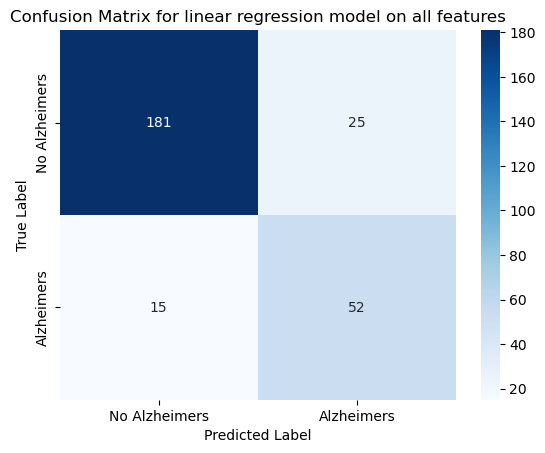

In [32]:
sns.heatmap(lr_conf_matrix["all_features"], annot=True, fmt="d", cmap="Blues", xticklabels=['No Alzheimers', 'Alzheimers'], yticklabels=['No Alzheimers', 'Alzheimers'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for linear regression model on all features")
plt.show()


### **Gradient Boosting Classifier**

In [33]:
gbc_pipe = Pipeline([('scale', StandardScaler()), ('gbc', GradientBoostingClassifier(random_state=42))])

gbc_accu_score = {}
gbc_conf_matrix = {}

for key in subcategory_dict:
    item = subcategory_dict[key]
    gbc_pipe.fit(df_train[item[:-1]], df_train.Diagnosis)
    pred = gbc_pipe.predict(df_test[item[:-1]])

    gbc_accu_score[key] = [accuracy_score(pred, df_test.Diagnosis),
                           precision_score(pred, df_test.Diagnosis, zero_division=1),
                           recall_score(pred, df_test.Diagnosis),
                           f1_score(pred, df_test.Diagnosis),
                           mean_squared_error(pred, df_test.Diagnosis)]
    gbc_conf_matrix[key] = confusion_matrix(pred, df_test.Diagnosis)

gbc_accu_score_df = pd.DataFrame(gbc_accu_score, index=['Accuracy Score', 'Precision Score', 'Recall Score', 'F1 Score', 'MSE'])
gbc_accu_score_df


c:\Users\ladyj\anaconda3\envs\erdos_spring_2025\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,all_features,demo,lifestyle,medic,clinical,cognitive,symptoms,no_cognitive
Accuracy Score,0.945055,0.699634,0.699634,0.721612,0.695971,0.937729,0.717949,0.681319
Precision Score,0.883117,0.012987,0.051948,0.025974,0.090909,0.857143,0.000000,0.064935
Recall Score,0.918919,0.142857,0.307692,0.666667,0.350000,0.916667,0.000000,0.250000
F1 Score,0.900662,0.023810,0.088889,0.050000,0.144330,0.885906,0.000000,0.103093
MSE,0.054945,0.300366,0.300366,0.278388,0.304029,0.062271,0.282051,0.318681


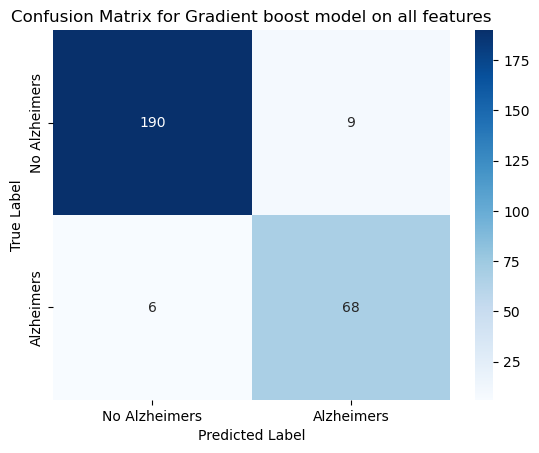

In [34]:
sns.heatmap(gbc_conf_matrix["all_features"], annot=True, fmt="d", cmap="Blues", xticklabels=['No Alzheimers', 'Alzheimers'], yticklabels=['No Alzheimers', 'Alzheimers'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Gradient boost model on all features")
plt.show()

### **Adaptive Boosting Classifier

In [35]:
adaboost_pipe = Pipeline([('scale', StandardScaler()), ('gbc', AdaBoostClassifier(random_state=42))])
adaboost_accu_score = {}
adaboost_conf_matrix = {}

for key in subcategory_dict:
    item = subcategory_dict[key]
    adaboost_pipe.fit(df_train[item[:-1]], df_train.Diagnosis)
    pred = adaboost_pipe.predict(df_test[item[:-1]])

    adaboost_accu_score[key] = [accuracy_score(pred, df_test.Diagnosis),
                           precision_score(pred, df_test.Diagnosis, zero_division=1),
                           recall_score(pred, df_test.Diagnosis),
                           f1_score(pred, df_test.Diagnosis),
                           mean_squared_error(pred, df_test.Diagnosis)]
    adaboost_conf_matrix[key] = confusion_matrix(pred, df_test.Diagnosis)

adaboost_accu_score_df = pd.DataFrame(adaboost_accu_score, index=['Accuracy Score', 'Precision Score', 'Recall Score', 'F1 Score', 'MSE'])
adaboost_accu_score_df


c:\Users\ladyj\anaconda3\envs\erdos_spring_2025\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\ladyj\anaconda3\envs\erdos_spring_2025\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\ladyj\anaconda3\envs\erdos_spring_2025\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ladyj\anaconda3\envs\erdos_spring_2025\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.

,all_features,demo,lifestyle,medic,clinical,cognitive,symptoms,no_cognitive
Accuracy Score,0.875458,0.717949,0.684982,0.717949,0.710623,0.937729,0.717949,0.655678
Precision Score,0.792208,0.000000,0.000000,0.000000,0.051948,0.857143,0.000000,0.038961
Recall Score,0.772152,0.000000,0.000000,0.000000,0.400000,0.916667,0.000000,0.130435
F1 Score,0.782051,0.000000,0.000000,0.000000,0.091954,0.885906,0.000000,0.060000
MSE,0.124542,0.282051,0.315018,0.282051,0.289377,0.062271,0.282051,0.344322


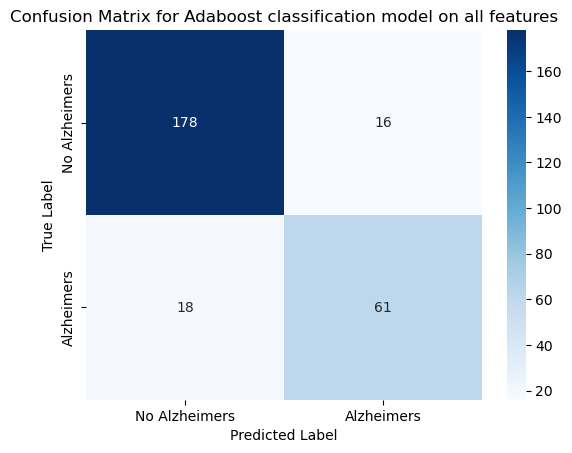

In [36]:
#Plotting confusion matrix
sns.heatmap(adaboost_conf_matrix["all_features"], annot=True, fmt="d", cmap="Blues", xticklabels=['No Alzheimers', 'Alzheimers'], yticklabels=['No Alzheimers', 'Alzheimers'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Adaboost classification model on all features")
plt.show()

### **Random Forest Classifier**

In [37]:
rfc_pipe = Pipeline([('scale', StandardScaler()), ('gbc', RandomForestClassifier(random_state=42))])
rfc_accu_score = {}
rfc_conf_matrix = {}

for key in subcategory_dict:
    item = subcategory_dict[key]
    rfc_pipe.fit(df_train[item[:-1]], df_train.Diagnosis)
    pred = rfc_pipe.predict(df_test[item[:-1]])

    rfc_accu_score[key] = [accuracy_score(pred, df_test.Diagnosis),
                           precision_score(pred, df_test.Diagnosis, zero_division=1),
                           recall_score(pred, df_test.Diagnosis),
                           f1_score(pred, df_test.Diagnosis),
                           mean_squared_error(pred, df_test.Diagnosis)]
    rfc_conf_matrix[key] = confusion_matrix(pred, df_test.Diagnosis)

rfc_accu_score_df = pd.DataFrame(rfc_accu_score, index=['Accuracy Score', 'Precision Score', 'Recall Score', 'F1 Score', 'MSE'])
rfc_accu_score_df

,all_features,demo,lifestyle,medic,clinical,cognitive,symptoms,no_cognitive
Accuracy Score,0.904762,0.622711,0.710623,0.695971,0.692308,0.948718,0.714286,0.714286
Precision Score,0.688312,0.168831,0.077922,0.038961,0.064935,0.870130,0.000000,0.000000
Recall Score,0.963636,0.250000,0.428571,0.250000,0.294118,0.943662,0.000000,0.000000
F1 Score,0.803030,0.201550,0.131868,0.067416,0.106383,0.905405,0.000000,0.000000
MSE,0.095238,0.377289,0.289377,0.304029,0.307692,0.051282,0.285714,0.285714


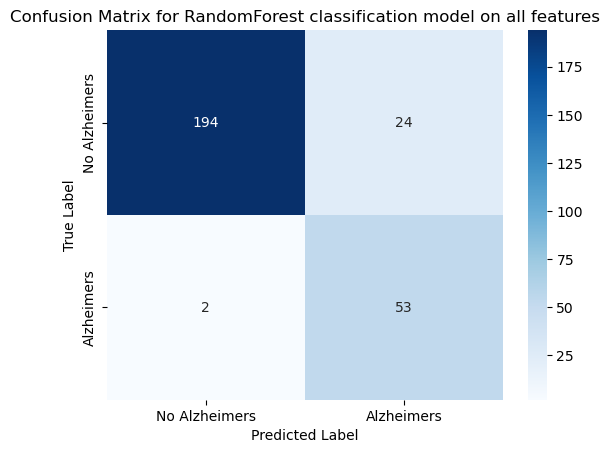

In [38]:
#Plotting confusion matrix
sns.heatmap(rfc_conf_matrix["all_features"], annot=True, fmt="d", cmap="Blues", xticklabels=['No Alzheimers', 'Alzheimers'], yticklabels=['No Alzheimers', 'Alzheimers'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for RandomForest classification model on all features")
plt.show()

### **XGBoost**

In [39]:
xgbc_pipe = Pipeline([('scale', StandardScaler()), ('gbc', XGBClassifier(random_state=42))])
xgbc_accu_score = {}
xgbc_conf_matrix = {}

for key in subcategory_dict:
    item = subcategory_dict[key]
    xgbc_pipe.fit(df_train[item[:-1]], df_train.Diagnosis)
    pred = xgbc_pipe.predict(df_test[item[:-1]])

    xgbc_accu_score[key] = [accuracy_score(pred, df_test.Diagnosis),
                           precision_score(pred, df_test.Diagnosis, zero_division=1),
                           recall_score(pred, df_test.Diagnosis),
                           f1_score(pred, df_test.Diagnosis),
                           mean_squared_error(pred, df_test.Diagnosis)]
    xgbc_conf_matrix[key] = confusion_matrix(pred, df_test.Diagnosis)

xgbc_accu_score_df = pd.DataFrame(xgbc_accu_score, index=['Accuracy Score', 'Precision Score', 'Recall Score', 'F1 Score', 'MSE'])
xgbc_accu_score_df

c:\Users\ladyj\anaconda3\envs\erdos_spring_2025\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,all_features,demo,lifestyle,medic,clinical,cognitive,symptoms,no_cognitive
Accuracy Score,0.956044,0.681319,0.659341,0.695971,0.626374,0.941392,0.717949,0.688645
Precision Score,0.883117,0.155844,0.181818,0.038961,0.129870,0.870130,0.000000,0.168831
Recall Score,0.957746,0.352941,0.318182,0.250000,0.222222,0.917808,0.000000,0.382353
F1 Score,0.918919,0.216216,0.231405,0.067416,0.163934,0.893333,0.000000,0.234234
MSE,0.043956,0.318681,0.340659,0.304029,0.373626,0.058608,0.282051,0.311355


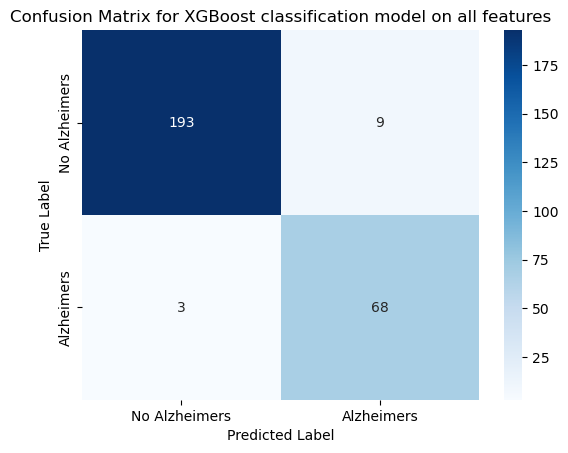

In [41]:
#Plotting confusion matrix
sns.heatmap(xgbc_conf_matrix["all_features"], annot=True, fmt="d", cmap="Blues", xticklabels=['No Alzheimers', 'Alzheimers'], yticklabels=['No Alzheimers', 'Alzheimers'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for XGBoost classification model on all features")
plt.show()